<a href="https://colab.research.google.com/github/Greatreyhan/ANN_Customer_Churn/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

**Load Data**

In [40]:
df = pd.read_csv('./Data.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1544,3794-NFNCH,Male,0,Yes,No,30,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,50.00,1474.9,No
6389,3777-XROBG,Female,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,1079.65,No
4162,0769-MURVM,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),65.70,4575.35,No
4918,6582-PLFUU,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,1086.75,No
2636,0907-HQNTS,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.00,7987.6,No


**Drop kolom customerID**

In [41]:
df.drop('customerID', axis='columns', inplace=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [43]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [45]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [46]:
df.shape

(7043, 20)

In [47]:
df[df.TotalCharges != ' '].shape

(7032, 20)

**Drop Blank Record**

In [48]:
df_clear = df[df.TotalCharges!=' ']
df_clear.shape

(7032, 20)

**Convert Total Charges menjadi numeric**

In [49]:
df_clear.TotalCharges = pd.to_numeric(df_clear.TotalCharges)
df_clear.dtypes

<ipython-input-49-8e7ca28f84c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.TotalCharges = pd.to_numeric(df_clear.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Data Cleaning**

In [50]:
df_clear.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [51]:
df_clear.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [52]:
for column in df_clear:
  if df_clear[column].dtypes=='object':
    print(f'{column} : {df_clear[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [53]:
df_clear.replace('No internet service','No',inplace=True)
df_clear.replace('No phone service','No',inplace=True)

<ipython-input-53-91e87c20973b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.replace('No internet service','No',inplace=True)
<ipython-input-53-91e87c20973b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.replace('No phone service','No',inplace=True)


In [54]:
for column in df_clear:
  if df_clear[column].dtypes=='object':
    print(f'{column} : {df_clear[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Convert 'Yes' = 1 dan 'No'=0**

In [55]:
col_to_convert=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in col_to_convert:
  df_clear[col].replace({'Yes':1, 'No':0}, inplace=True)

<ipython-input-55-9fc0c6649a3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[col].replace({'Yes':1, 'No':0}, inplace=True)


In [56]:
df_clear.gender.replace({'Female':1, 'Male':0}, inplace=True)

<ipython-input-56-1fef1fb7581c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.gender.replace({'Female':1, 'Male':0}, inplace=True)


In [57]:
for column in df_clear:
  print(f'{column} : {df_clear[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


**One-hot Encoding**

In [58]:
df_numeric = pd.get_dummies(data=df_clear, columns=['InternetService','Contract','PaymentMethod'])
df_numeric.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df_numeric.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
799,0,0,0,0,62,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1401,1,1,0,0,4,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
2453,1,1,0,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6882,1,1,0,0,71,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
6630,0,1,0,0,16,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [60]:
df_numeric.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

**Data Normalization**

In [61]:
cols_to_scale=['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numeric[cols_to_scale] = scaler.fit_transform(df_numeric[cols_to_scale])

In [62]:
for column in df_numeric:
  print(f'{column} : {df_numeric[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

**Data Visualization**

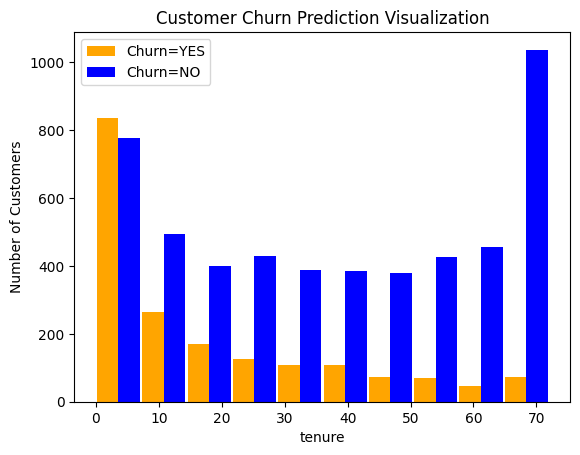

In [71]:
customer_stay = df[df.Churn=="No"].tenure
customer_out = df[df.Churn=="Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([customer_out, customer_stay], rwidth=0.95, color=['orange','blue'], label=["Churn=YES", "Churn=NO"])
plt.legend()
plt.show()

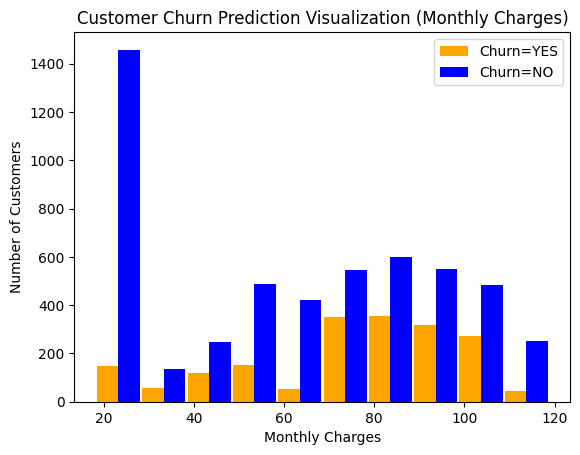

In [72]:
customer_stay = df[df.Churn=="No"].MonthlyCharges
customer_out = df[df.Churn=="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization (Monthly Charges)")

plt.hist([customer_out, customer_stay], rwidth=0.95, color=['orange','blue'], label=["Churn=YES", "Churn=NO"])
plt.legend()
plt.show()

**Train Test Split**

In [65]:
X = df_numeric.drop('Churn',axis='columns')
y = df_numeric['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [66]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [67]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [68]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 6s 7ms/step - loss: 0.5011 - accuracy: 0.7600
Epoch 2/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4249 - accuracy: 0.7922
Epoch 3/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4185 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4169 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4103 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4065 - accura

In [32]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 7ms/step - loss: 0.5147 - accuracy: 0.7640


[0.5147399306297302, 0.7640369534492493]

In [33]:
yp= model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.24178456],
       [0.4350195 ],
       [0.00116352],
       [0.78907186],
       [0.3602746 ]], dtype=float32)

In [34]:
y_hat = []
for element in yp:
  if element > 0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)

In [35]:
y_hat[:5]

[0, 0, 0, 1, 0]

In [36]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       999
           1       0.65      0.41      0.50       408

    accuracy                           0.76      1407
   macro avg       0.72      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

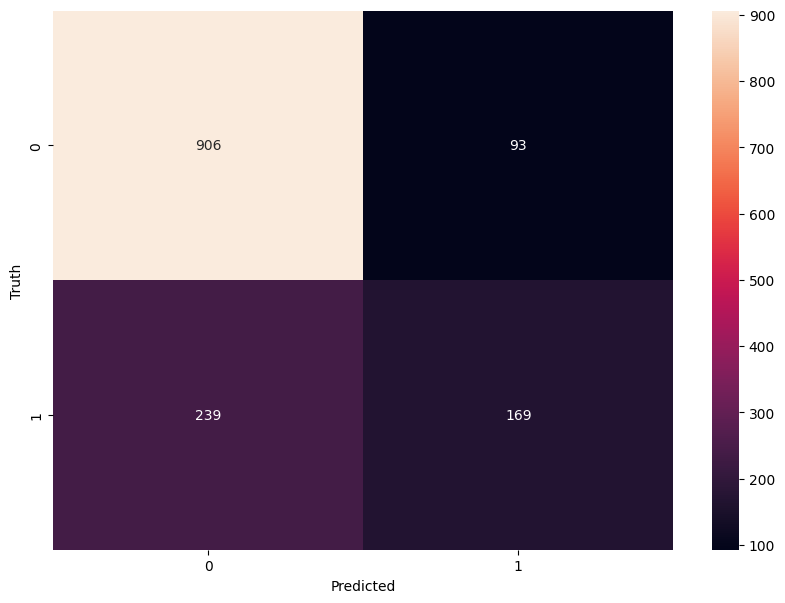

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_hat)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Handling Imbalance Data**

**Undersampling**
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [76]:
total_stay, total_out = df_numeric.Churn.value_counts()

In [77]:
# Membagi menjadi 2 class
df_stay = df_numeric[df_numeric['Churn'] == 0]
df_out = df_numeric[df_numeric['Churn'] == 1]

In [78]:
df_stay.shape, df_out.shape

((5163, 27), (1869, 27))

In [81]:
# mengurangi data df_stay sehingga sama jumlahnya
df_stay = df_stay.sample(total_out)
df_total = pd.concat([df_stay,df_out], axis=0)
df_total.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [84]:
# Train & Test Split
X = df_total.drop('Churn', axis='columns')
y = df_total.Churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5, stratify=y)

In [85]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [86]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.5862 - accuracy: 0.6990
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7508
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5021 - accuracy: 0.7525
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7548
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4950 - accuracy: 0.7599
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7602
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4896 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7622
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4854 - accuracy: 0.7649
Epoch 11/

In [88]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7607


[0.5249426364898682, 0.7606951594352722]

In [92]:
y_hat = model.predict(X_test)
y_hat = np.round(y_hat)
print("Classification Report : \n", classification_report(y_test, y_hat))

24/24 [==============================] - 0s 5ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       374
           1       0.76      0.76      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



**Over Sampling**

In [93]:
total_stay, total_out = df_numeric.Churn.value_counts()

In [94]:
# Membagi menjadi 2 class
df_stay = df_numeric[df_numeric['Churn'] == 0]
df_out = df_numeric[df_numeric['Churn'] == 1]

In [95]:
df_stay.shape, df_out.shape

((5163, 27), (1869, 27))

In [97]:
# menambah data df_out sehingga sama jumlahnya
df_out = df_out.sample(total_stay, replace=True)
df_total = pd.concat([df_stay,df_out], axis=0)
df_total.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [98]:
# Train & Test Split
X = df_total.drop('Churn', axis='columns')
y = df_total.Churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5, stratify=y)

In [99]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [100]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.7292
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4892 - accuracy: 0.7627
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4808 - accuracy: 0.7622
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4774 - accuracy: 0.7674
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4732 - accuracy: 0.7692
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4706 - accuracy: 0.7691
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4681 - accuracy: 0.7697
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4662 - accuracy: 0.7753
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4637 - accuracy: 0.7752
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4612 - accura

In [101]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 1s 5ms/step - loss: 0.4307 - accuracy: 0.8190


[0.4306910037994385, 0.8189738392829895]

In [102]:
y_hat = model.predict(X_test)
y_hat = np.round(y_hat)
print("Classification Report : \n", classification_report(y_test, y_hat))

65/65 [==============================] - 0s 3ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.80      0.85      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



**SMOTHE**

In [106]:
X = df_numeric.drop('Churn',axis="columns")
y = df_numeric['Churn']

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [113]:
# Train & Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=5, stratify=y_sm)

In [114]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [115]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5187 - accuracy: 0.7487
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4742 - accuracy: 0.7753
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4659 - accuracy: 0.7820
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.7823
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4537 - accuracy: 0.7856
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4495 - accuracy: 0.7896
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.7850
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.7936
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.7941
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4361 - accura

In [116]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8054


[0.41667935252189636, 0.8054211139678955]

In [117]:
y_hat = model.predict(X_test)
y_hat = np.round(y_hat)
print("Classification Report : \n", classification_report(y_test, y_hat))

65/65 [==============================] - 0s 3ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      1033
           1       0.76      0.89      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.80      2066
weighted avg       0.81      0.81      0.80      2066

